## data preprocessing

In [167]:
# Install required libraries
# !pip install pandas numpy scikit-learn nltk matplotlib seaborn

# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [168]:
!kaggle datasets download -d gpreda/covid19-tweets


Dataset URL: https://www.kaggle.com/datasets/gpreda/covid19-tweets
License(s): CC0-1.0
covid19-tweets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [169]:
!unzip covid19-tweets.zip


Archive:  covid19-tweets.zip
replace covid19_tweets.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: covid19_tweets.csv      


In [170]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('covid19_tweets.csv')

# sampling out of the data for tests
df = df.sample(n=1000, random_state=42)

# Display the first few rows of the dataframe
df.head()


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
20213,British Landlords Association (The BLA),United Kingdom,British Landlords Association -The BLA a FREE ...,2015-07-13 10:44:04,13360,2337,12440,False,2020-07-26 06:55:54,The latest The British Landlord Association Da...,NaN,Paper.li,False
148810,Mo Eco Devo,"Jefferson City, MO",Helping create opportunities for Missourians t...,2009-10-01 18:28:54,4082,531,1360,True,2020-08-18 18:02:45,#COVID19 has affected business owners and work...,"['COVID19', 'MO']",Hootsuite Inc.,False
10763,KYT,"Thane, India","From the house of Thanevaibhav, Thane district...",2016-11-02 16:45:08,239,14,168,False,2020-07-25 05:09:23,July 24: #Thane city #COVID19 update\nNew case...,"['Thane', 'COVID19']",Twitter Web App,False
30395,Dr. Wolfgang H Thome,Germany,"Publisher of ATCNews, Africa's largest publica...",2010-04-20 06:38:31,11759,812,45496,False,2020-07-27 03:03:04,#COVID19\nGlobal overnight developments from 2...,['COVID19'],Twitter Web App,False
69398,Belinda Hayes,Melbourne,Communicating the amazing stories from @monash...,2009-08-27 07:28:18,478,720,217,False,2020-08-04 06:39:22,Theatre can respond to the gendered impacts of...,['COVID19'],Hootsuite Inc.,False


In [171]:
# import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Function to clean text
def clean_text(text):
    text = str(text)  # Convert to string (handling NaN)
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower().strip()  # Convert to lowercase and strip whitespace
    return text

# Apply text cleaning
df['clean_description'] = df['user_description'].apply(clean_text)

# Display the cleaned text
df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,clean_description
20213,British Landlords Association (The BLA),United Kingdom,British Landlords Association -The BLA a FREE ...,2015-07-13 10:44:04,13360,2337,12440,False,2020-07-26 06:55:54,The latest The British Landlord Association Da...,NaN,Paper.li,False,british landlords association the bla a free a...
148810,Mo Eco Devo,"Jefferson City, MO",Helping create opportunities for Missourians t...,2009-10-01 18:28:54,4082,531,1360,True,2020-08-18 18:02:45,#COVID19 has affected business owners and work...,"['COVID19', 'MO']",Hootsuite Inc.,False,helping create opportunities for missourians t...
10763,KYT,"Thane, India","From the house of Thanevaibhav, Thane district...",2016-11-02 16:45:08,239,14,168,False,2020-07-25 05:09:23,July 24: #Thane city #COVID19 update\nNew case...,"['Thane', 'COVID19']",Twitter Web App,False,from the house of thanevaibhav thane districts...
30395,Dr. Wolfgang H Thome,Germany,"Publisher of ATCNews, Africa's largest publica...",2010-04-20 06:38:31,11759,812,45496,False,2020-07-27 03:03:04,#COVID19\nGlobal overnight developments from 2...,['COVID19'],Twitter Web App,False,publisher of atcnews africas largest publicati...
69398,Belinda Hayes,Melbourne,Communicating the amazing stories from @monash...,2009-08-27 07:28:18,478,720,217,False,2020-08-04 06:39:22,Theatre can respond to the gendered impacts of...,['COVID19'],Hootsuite Inc.,False,communicating the amazing stories from monashuni


In [172]:
# Ensure user_created is in datetime format
df['user_created'] = pd.to_datetime(df['user_created'], errors='coerce', format='%Y-%m-%d %H:%M:%S')

# Calculate account age (vectorized operation)
df['account_age'] = (pd.Timestamp.now() - df['user_created']).dt.days

# Convert relevant columns to numeric (handling possible errors)
df['user_followers'] = pd.to_numeric(df['user_followers'], errors='coerce')
df['user_friends'] = pd.to_numeric(df['user_friends'], errors='coerce')
df['user_favourites'] = pd.to_numeric(df['user_favourites'], errors='coerce')
df['user_verified'] = df['user_verified'].apply(lambda x: 1 if x else 0)

# Calculate tweets per day, handling division by zero or NaN
df['tweets_per_day'] = df['user_favourites'] / df['account_age'].replace({0: 1, None: 1})

# Handle missing values
df.fillna(0, inplace=True)

# Limit the number of unique locations for one-hot encoding to reduce memory usage
top_locations = df['user_location'].value_counts().nlargest(50).index
df['user_location'] = df['user_location'].apply(lambda x: x if x in top_locations else 'Other')
df = pd.get_dummies(df, columns=['user_location'])

# Display the first few rows of the DataFrame to verify
print(df.head())

                                      user_name  \
20213   British Landlords Association (The BLA)   
148810                              Mo Eco Devo   
10763                                       KYT   
30395                      Dr. Wolfgang H Thome   
69398                             Belinda Hayes   

                                         user_description        user_created  \
20213   British Landlords Association -The BLA a FREE ... 2015-07-13 10:44:04   
148810  Helping create opportunities for Missourians t... 2009-10-01 18:28:54   
10763   From the house of Thanevaibhav, Thane district... 2016-11-02 16:45:08   
30395   Publisher of ATCNews, Africa's largest publica... 2010-04-20 06:38:31   
69398   Communicating the amazing stories from @monash... 2009-08-27 07:28:18   

        user_followers  user_friends  user_favourites  user_verified  \
20213            13360          2337            12440              0   
148810            4082           531             1360         

## user description - TF-IDF Vectorizer

In [173]:
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the cleaned descriptions
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_description'])

# # Convert sparse matrix to DataFrame (for visualization and analysis)
# tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# # Display TF-IDF matrix
# print(tfidf_df.head())


## other features  standart scaler

In [174]:
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack


# # Scale numeric user metadata
# numeric_features = ['user_followers', 'user_friends']
# scaler = StandardScaler()

# # Transform numeric features
# numeric_data = scaler.fit_transform(df[numeric_features])

# # Combine TF-IDF matrix with scaled numeric metadata
# combined_features = hstack([tfidf_matrix, numeric_data])

# Numeric and categorical features
numeric_features = ['user_followers', 'user_friends', 'tweets_per_day', 'user_verified']
categorical_features = [col for col in df.columns if col.startswith('user_location_')]

# Scale numeric features
scaler = StandardScaler()
numeric_data = scaler.fit_transform(df[numeric_features].fillna(0))

# Combine TF-IDF, numeric, and categorical data
combined_features = hstack([tfidf_matrix, numeric_data, df[categorical_features].values])


## PCA and Clustering

In [175]:
from sklearn.decomposition import PCA

# # Dimensionality Reduction using PCA
# pca = PCA(n_components=50)  # Adjust the number of components based on variance explained
# reduced_features = pca.fit_transform(combined_features.toarray())


Elbow Method function:

In [176]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def elbow_method_visualization(data, max_k):
    # Calculate distortions (inertia) for different values of k
    distortions = []
    for k in range(2, max_k):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    # Plot distortions to find optimal k (Elbow Method)
    plt.plot(range(2, max_k), distortions, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal K')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


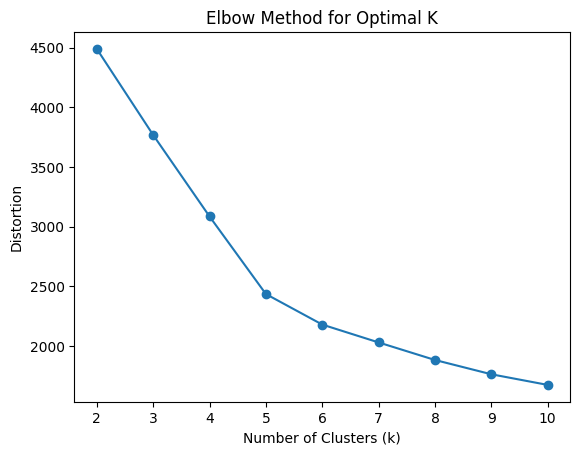

In [177]:
elbow_method_visualization(combined_features, 11)

In [178]:
# Choose optimal k based on the plot (e.g., where the distortion starts to level off)
optimal_k = 5

## visualization of clustering

In [188]:
from tkinter import FALSE
from sklearn.cluster import KMeans, OPTICS, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

def visualization_of_clustering(data, k=11, first_feature=0, is_sparce=False):
    palette = 'Set1'

    # Perform K-means clustering with optimal k
    kmeans = KMeans(n_clusters=k, random_state=42)
    df['cluster'] = kmeans.fit_predict(data)

    # Plot using components 2 and 3 for K-means clusters
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=df['cluster'], palette=palette, legend='full')
    plt.title('PCA Plot of User Clusters (PCA Components 2 and 3 - K-means)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()


    # DBSCAN for density-based clustering
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    df['dbscan_cluster'] = dbscan.fit_predict(data)

    # Plot using components 2 and 3 for DBSCAN clusters
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=data[:, first_feature], y=data[:, first_feature+1], hue=df['dbscan_cluster'], palette=palette, legend='full')
    plt.title('PCA Plot of User Clusters (PCA Components 2 and 3 - DBSCAN)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()


    # OPTICS for hierarchical density-based clustering
    optics = OPTICS(min_samples=5)
    if is_sparce:  # if we're working on PCA values
        df['optics_cluster'] = optics.fit_predict(data)
    else:  # if we are working on regular data
        df['optics_cluster'] = optics.fit_predict(data.toarray())

    # Plot using PCA components for OPTICS clusters
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=data[:, first_feature], y=data[:, first_feature+1], hue=df['optics_cluster'], palette=palette, legend='full')
    plt.title('PCA Plot of User Clusters (OPTICS)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

performing PCA with 2 first components:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


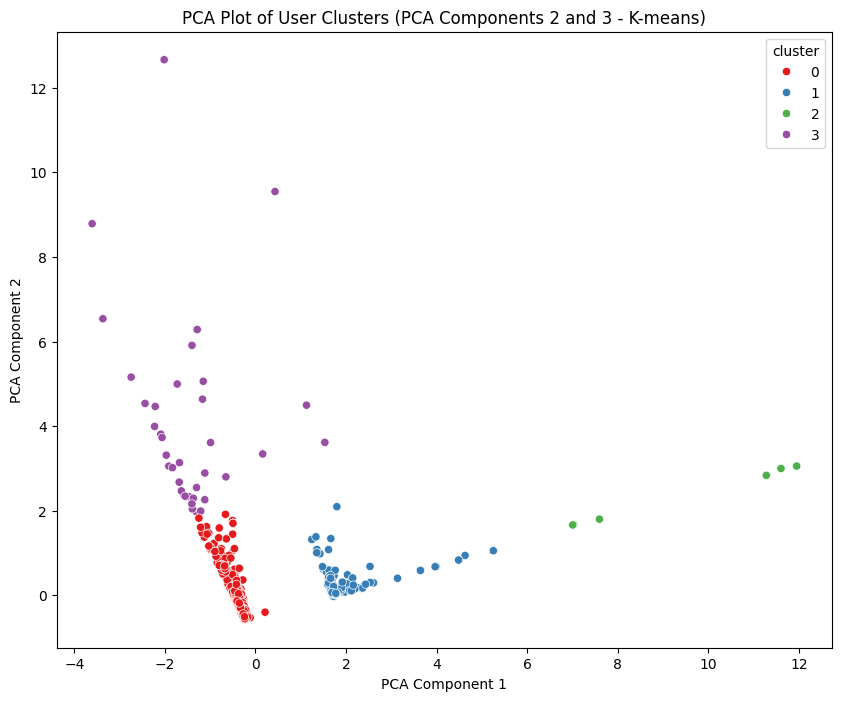

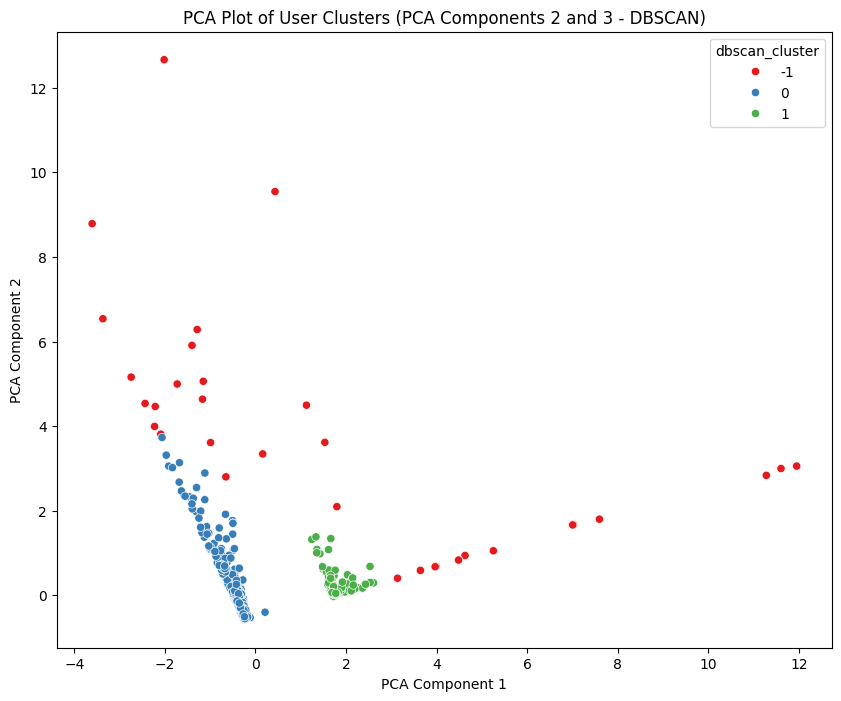

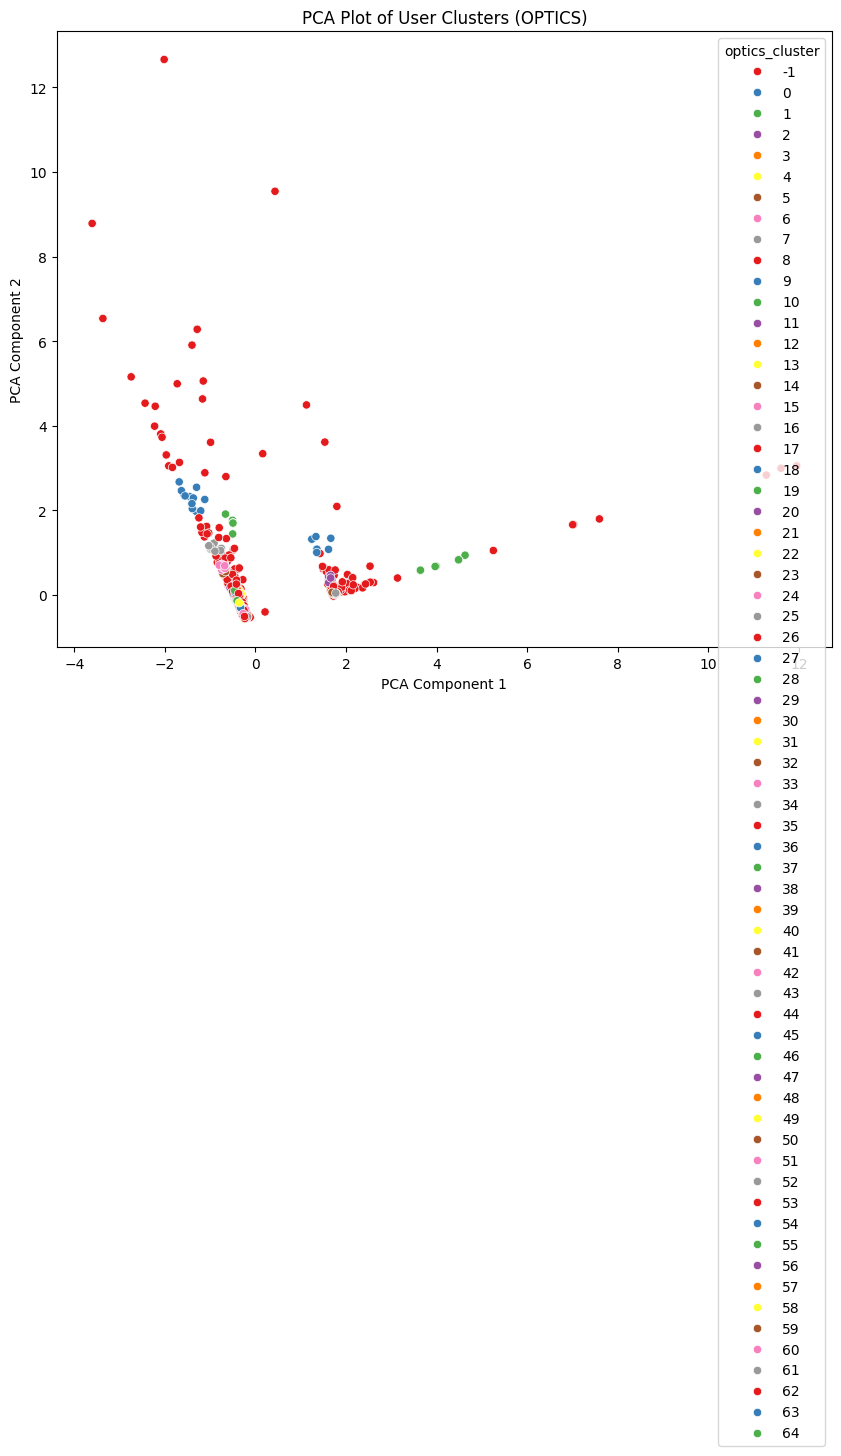

In [189]:
# Perform PCA with 2 components
pca = PCA(n_components=2)
combined_features_pca = pca.fit_transform(combined_features.toarray())

visualization_of_clustering(combined_features_pca, optimal_k, first_feature=0, is_sparce=True)

performing PCA with 3 first components, later we will use only the 2nd and 3rd:

In [193]:
# Perform PCA with 4 components
pca = PCA(n_components=3)
combined_features_pca = pca.fit_transform(combined_features.toarray())

# Remove the first principal component
combined_features_pca_no_pc1 = combined_features_pca[:, 1:]  # Remove the first column (PC1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

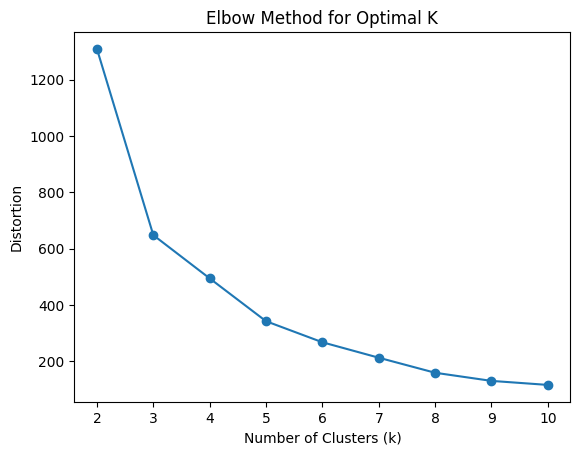

In [194]:
elbow_method_visualization(combined_features_pca_no_pc1, 11)

In [195]:
optimal_k = 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


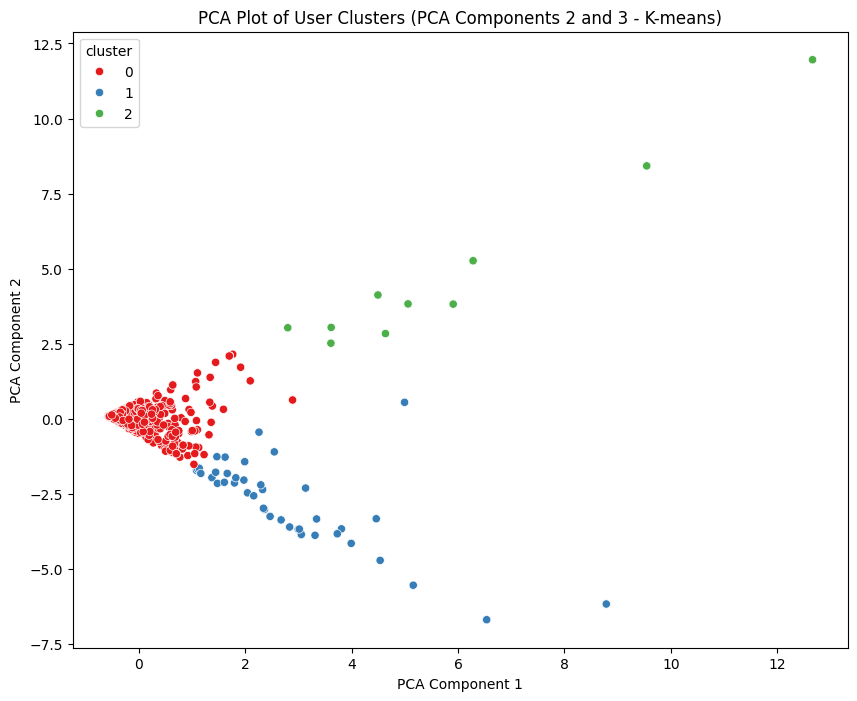

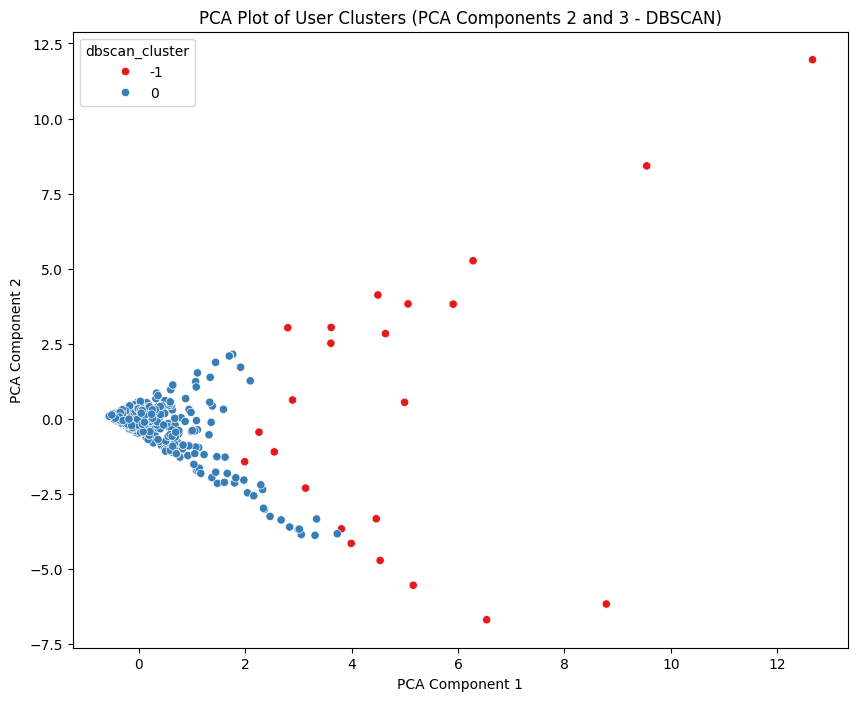

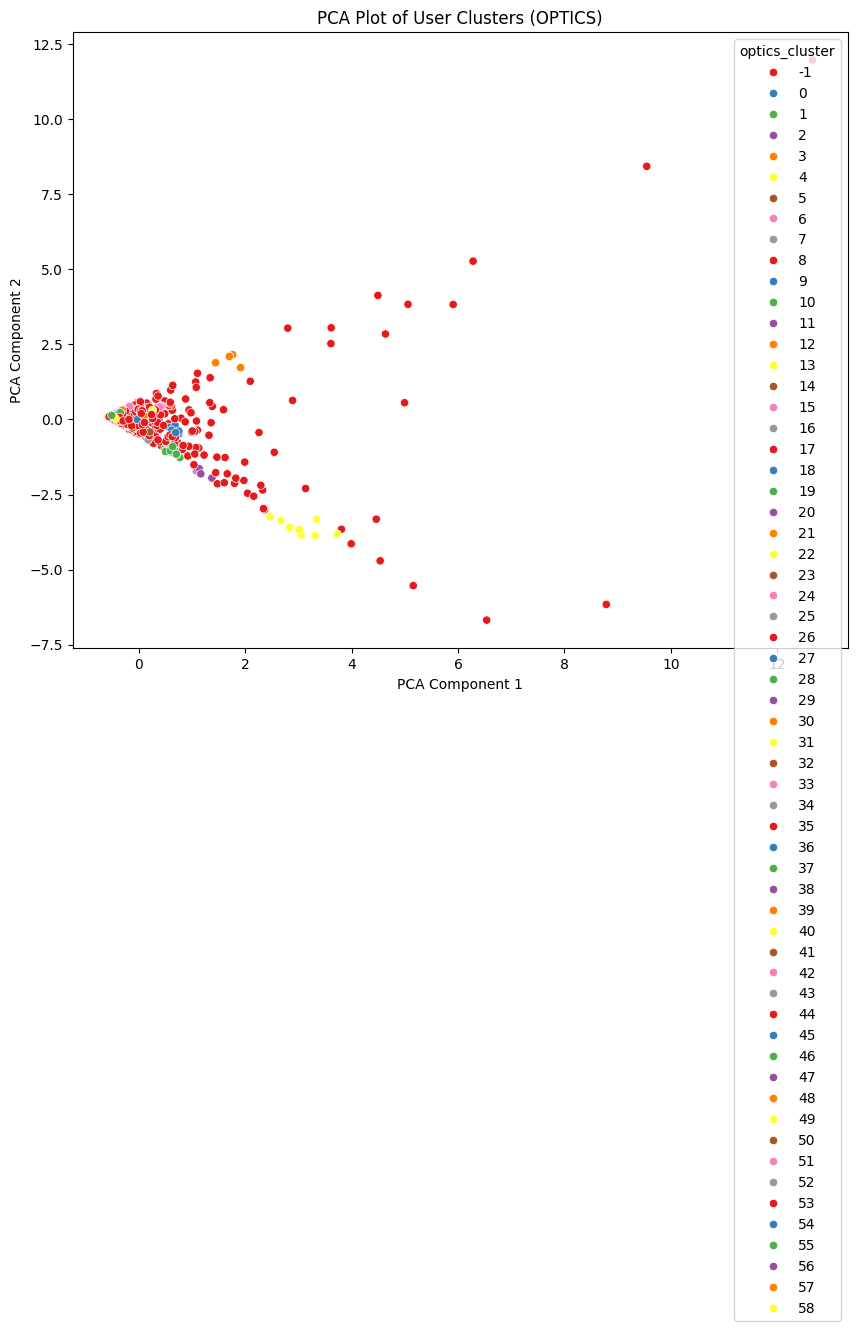

In [196]:
visualization_of_clustering(combined_features_pca_no_pc1, optimal_k, first_feature=0, is_sparce=True)

## Deeper Understanding of Clustering

In [190]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

def info_of_clusters(data):
    # Display cluster centers (optional)
    cluster_centers = kmeans.cluster_centers_
    print("Cluster Centers:")
    print(cluster_centers)

    # Evaluate with silhouette score
    score = silhouette_score(data, df['cluster'])
    print(f'Silhouette Score: {score}')

    # Optional: Try DBSCAN for density-based clustering
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    df['dbscan_cluster'] = dbscan.fit_predict(data)

    # Analyze cluster distributions and characteristics
    for cluster in df['cluster'].unique():
        cluster_data = df[df['cluster'] == cluster]
        print(f'Cluster {cluster}:')
        print(cluster_data.describe())  # Summary statistics
        print(cluster_data['clean_description'].value_counts().head(10))  # Most common words/phrases

    # Display the first few rows of the DataFrame with cluster assignments
    print(df.head())


In [186]:
info_of_clusters(combined_features_pca)

Cluster Centers:
[[-0.26185803  0.04323023  0.21868059]
 [ 2.76041089 -2.7375664   0.38724748]
 [ 5.90040663  4.92260589  0.83867604]
 [ 0.25520287  0.22606002 -1.65832683]]
Silhouette Score: 0.608739896069705
Cluster 0:
                        user_created  user_followers  user_friends  \
count                            871    8.710000e+02    871.000000   
mean   2013-12-24 22:58:59.226176768    2.624153e+04   1321.516648   
min              2007-03-28 06:17:24    0.000000e+00      0.000000   
25%       2010-05-02 13:20:34.500000    1.610000e+02    141.500000   
50%              2013-04-12 13:10:34    7.840000e+02    472.000000   
75%              2017-08-27 09:31:54    4.584500e+03   1283.500000   
max              2020-08-29 16:05:36    1.142645e+06  26032.000000   
std                              NaN    1.130392e+05   2776.867898   

       user_favourites  user_verified  account_age  tweets_per_day  cluster  \
count       871.000000     871.000000   871.000000      871.000000   

In [187]:
info_of_clusters(combined_features_pca_no_pc1)

Cluster Centers:
[[-0.26185803  0.04323023  0.21868059]
 [ 2.76041089 -2.7375664   0.38724748]
 [ 5.90040663  4.92260589  0.83867604]
 [ 0.25520287  0.22606002 -1.65832683]]
Silhouette Score: 0.6986346454228253
Cluster 0:
                        user_created  user_followers  user_friends  \
count                            871    8.710000e+02    871.000000   
mean   2013-12-24 22:58:59.226176768    2.624153e+04   1321.516648   
min              2007-03-28 06:17:24    0.000000e+00      0.000000   
25%       2010-05-02 13:20:34.500000    1.610000e+02    141.500000   
50%              2013-04-12 13:10:34    7.840000e+02    472.000000   
75%              2017-08-27 09:31:54    4.584500e+03   1283.500000   
max              2020-08-29 16:05:36    1.142645e+06  26032.000000   
std                              NaN    1.130392e+05   2776.867898   

       user_favourites  user_verified  account_age  tweets_per_day  cluster  \
count       871.000000     871.000000   871.000000      871.000000  